# Pre entrega Data Science - Fundamentos-para-la-ciencia-de-datos
Comisión: 60905

Alumna: Sabrina Benedetto


# Sobre el Dataset


---
El dataset elegido se llama “Prediction of Churning Credit Card Customers” [(Fuente)](https://doi.org/10.5281/zenodo.4322342), obtenido del repositorio de  [Kaggle](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m).

## Objetivo
Predecir la cantidad de clientes que abandonará la relación comercial con la tarjeta de crédito (customer attrition) en base a la información disponible:

*  datos demográficos para identificar qué grupo demográfico es más plausible de abandonar la tarjeta

*  comportamiento de gasto del cliente hasta el momento del para predecir mejor la probabilidad de que un cliente abandone en el futuro
*  métricas de comportamiento de gasto a lo largo del tiempo para predecir los clientes potenciales más susceptibles de deserción en función de su puntuación de crédito, límite de crédito, ratio de utilización, etc.

En términos de gestión de la cartera, las variables del dataset permiten analizar los factores que influyen en la la cantidad de clientes que abandonan la relación comercial.

## Descripción del problema
El problema se aborda desde la siguiente pregunta:
¿Qué aspectos influyen en la cantidad de clientes que dejan de tener la tarjeta de crédito y abandonan la relación comercial?

## Variables del dataset

*   CLIENTNUM: Identificador único para cada cliente
*   Attrition_Flag: Bandera que indica si el cliente se ha dado de baja o no
*   Customer_Age: Edad del cliente
*   Gender: Sexo del cliente
*   Dependent_count: Número de dependientes que tiene el cliente
*   Education_Level: Nivel de estudios del cliente
*   Marital_Status: Estado civil del cliente
*   Income_Category: Categoría de ingresos del cliente
*   Card_Category: Tipo de tarjeta del cliente
*   Months_on_book: El tiempo que el cliente ha estado en el vínculo comercial
*   Total_Relationship_Count: Número total de relaciones que tiene el cliente con el proveedor de la tarjeta de crédito
*   Months_Inactive_12_mon: Número de meses que el cliente ha estado inactivo en los últimos doce meses
*  Contacts_Count_12_mon: Número de contactos que ha tenido el cliente en los últimos doce meses
*   Credit_Limit: Límite de crédito del cliente
*   Total_Revolving_Bal: Saldo consumido impago y refinanciado total (se traslada al mes siguiente - revolving)
*   Avg_Open_To_Buy: Ratio medio de "apertura a compra"  (OTB) del cliente (límite disponible). Equivale a (credit limit-revolving_balance)
*   Total_Amt_Chng_Q4_Q1: Cambio del importe total  del trimestre 4 respecto del trimestre 1
*   Total_Trans_Amt: Importe total de la transacción
*   Total_Trans_Ct: Número total de transacciones
*   Total_Ct_Chng_Q4_Q1: Cambio en el recuento total del trimestre 4 respecto del trimestre 1
*   Avg_Utilization_Ratio: Ratio medio de utilización del cliente. Equivale a: Total_Revolving_Bal / Credit_Limit
*   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_1: Indicador de Naive_Baayes para predecir si alguien se dará de baja o no en función de determinadas características




In [1]:
# Instalo las librerías
! pip install seaborn
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install openpyxl
! pip install xlrd

In [2]:
# Importo las librerías
import numpy as np   # importo la libreria numpy
import pandas as pd  # importo la libreria pandas
import matplotlib.pyplot as plt # importo la libreria de visualizacione matplot, en su extensión pyplot
import seaborn as sns
from openpyxl.workbook import Workbook # Importo la librería para exportar a excel

In [3]:
from google.colab import drive
drive.mount('/content/drive')   # Indico la carpeta donde ubicarse

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Data Science - Coderhouse/Pre-Entrega/BankChurners.csv',sep=',') # Leo el df y veo los 5 primeros registros
df.head(2)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


##Características del dataframe
El dataframe tiene 10127 filas y 23 columnas y no tiene valores nulos.


In [5]:
df.info()   # Obtengo información del Dataframe. No hay nulos. También lo podia ver con df.isnull().sum().sort_values(ascending=False).
            # si sólo queria cantidad de filas y columnas, usaba la función df.shape
# Renombro las últimas 2 columnas para facilitar el nombre y listo los nombres de las columnas para chequear
df = df.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1": "Naive_Bayes_1"})
df = df.rename(columns={"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2": "Naive_Bayes_2"})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

El dataset no presenta valores nulos.

In [6]:
# Convierto los datos que sea necesario
df = df.convert_dtypes(infer_objects=True)
df['Income_Category']=df['Income_Category'].astype('string')
df['Credit_Limit'] = df['Credit_Limit'].astype('float')
df['Avg_Open_To_Buy'] = df['Avg_Open_To_Buy'].astype('float')
df['Total_Amt_Chng_Q4_Q1'] = df['Total_Amt_Chng_Q4_Q1'].astype('float')
df['Total_Ct_Chng_Q4_Q1'] = df['Total_Ct_Chng_Q4_Q1'].astype('float')
df['Avg_Utilization_Ratio'] = df['Avg_Utilization_Ratio'].astype('float')
df['Naive_Bayes_1'] = df['Naive_Bayes_1'].astype('float')
df['Naive_Bayes_2'] = df['Naive_Bayes_2'].astype('float')
# Chequeo los tipos de datos
df.dtypes

CLIENTNUM                     Int64
Attrition_Flag               string
Customer_Age                  Int64
Gender                       string
Dependent_count               Int64
Education_Level              string
Marital_Status               string
Income_Category              string
Card_Category                string
Months_on_book                Int64
Total_Relationship_Count      Int64
Months_Inactive_12_mon        Int64
Contacts_Count_12_mon         Int64
Credit_Limit                float64
Total_Revolving_Bal           Int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               Int64
Total_Trans_Ct                Int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Naive_Bayes_1               float64
Naive_Bayes_2               float64
dtype: object

In [7]:
# Obtengo las principales medidas del dataframe, presentando 2 decimales.
df.describe().round(2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2
count,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.0,10127.00,10127.0,10127.00,10127.00,10127.0,10127.0,10127.00,10127.00,10127.00,10127.00
mean,739177606.33,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27,0.16,0.84
std,36903783.45,8.02,1.3,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28,0.37,0.37
min,708082083.0,26.0,0.0,13.0,1.0,0.0,0.0,1438.30,0.0,3.00,0.00,510.0,10.0,0.00,0.00,0.00,0.00
25%,713036770.5,41.0,1.0,31.0,3.0,2.0,2.0,2555.00,359.0,1324.50,0.63,2155.5,45.0,0.58,0.02,0.00,1.00
50%,717926358.0,46.0,2.0,36.0,4.0,2.0,2.0,4549.00,1276.0,3474.00,0.74,3899.0,67.0,0.70,0.18,0.00,1.00
75%,773143533.0,52.0,3.0,40.0,5.0,3.0,3.0,11067.50,1784.0,9859.00,0.86,4741.0,81.0,0.82,0.50,0.00,1.00
max,828343083.0,73.0,5.0,56.0,6.0,6.0,6.0,34516.00,2517.0,34516.00,3.40,18484.0,139.0,3.71,1.00,1.00,1.00


In [8]:
# Calculo la proporción de clientes no vigentes respecto del total de clientes
df.Attrition_Flag.unique()  # observo los posibles valores de las cadenas de texto en la columna "Attrition_Flag"
df.Attrition_Flag.value_counts() # cuento la cantidad de clientes vigentes y no vigentes
abandono_tot=df.Attrition_Flag.loc[df['Attrition_Flag']=='Attrited Customer'].count() # asigno a una variable la cantidad total de clientes no vigentes
abandono_tot_porc= ((abandono_tot / df.Attrition_Flag.count())*100).round(2)
print('Los clientes vigentes son:', df.Attrition_Flag.loc[df.Attrition_Flag=='Existing Customer'].count())
print('Los clientes no vigentes son:', abandono_tot)
print('Proporción de clientes no vigentes respecto del total:', abandono_tot_porc,'%')

Los clientes vigentes son: 8500
Los clientes no vigentes son: 1627
Proporción de clientes no vigentes respecto del total: 16.07 %


In [9]:
# Creo un nuevo df que sólo incluya los clientes no vigentes. Lo llamo df_1.
df_1=df.loc[df.Attrition_Flag=='Attrited Customer']
df_1.head(2)
df_1.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2
count,1627.0,1627.0,1627.0,1627.0,1627.0,1627.0,1627.0,1627.000000,1627.0,1627.000000,1627.000000,1627.0,1627.0,1627.000000,1627.000000,1627.000000,1627.000000
mean,735261381.263675,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.93362,0.554386,0.162475,0.994909,0.005091
std,35577253.360484,7.665652,1.27501,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458,0.004303,0.004303
min,708083283.0,26.0,0.0,13.0,1.0,0.0,0.0,1438.300000,0.0,3.000000,0.000000,510.0,10.0,0.000000,0.000000,0.945910,0.000420
25%,712371258.0,41.0,2.0,32.0,2.0,2.0,2.0,2114.000000,0.0,1587.000000,0.544500,1903.5,37.0,0.400000,0.000000,0.994300,0.002825
50%,716564433.0,47.0,2.0,36.0,3.0,3.0,3.0,4178.000000,0.0,3488.000000,0.701000,2329.0,43.0,0.531000,0.000000,0.996310,0.003688
75%,768373683.0,52.0,3.0,40.0,5.0,3.0,4.0,9933.500000,1303.5,9257.500000,0.856000,2772.0,51.0,0.692000,0.231000,0.997170,0.005700
max,828294933.0,68.0,5.0,56.0,6.0,6.0,6.0,34516.000000,2517.0,34516.000000,1.492000,10583.0,94.0,2.500000,0.999000,0.999580,0.054090


# Consigna: Visualizaciones en Matplotlib y Seaborn. Determinación de insights.

Análisis por **género**

In [10]:
# Categorías de género y cantidad de registros para cada categoría
print('Las posibles categorías de género son:', df_1.Gender.value_counts())


Las posibles categorías de género son: F    930
M    697
Name: Gender, dtype: Int64


([<matplotlib.patches.Wedge at 0x78ed3948f8e0>,
 [Text(-0.24536467578085264, 1.0722854917786389, 'F'),
  Text(0.24536467578085203, -1.072285491778639, 'M')],
 [Text(-0.13383527769864687, 0.5848829955156212, '57.2%'),
  Text(0.13383527769864653, -0.5848829955156212, '42.8%')])

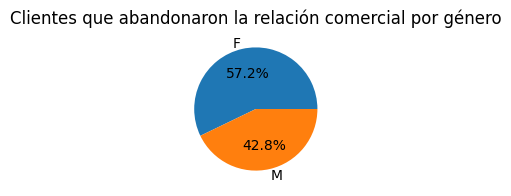

In [11]:
# Se realiza un pie chart con la participación porcentual de cada categoría de género en el grupo de clientes no vigentes

gender_label=df_1.Gender.unique()       # defino las etiquetas de género con la fn unique, que da las posibles cadenas de texto en la serie
gender_data=df_1.Gender.value_counts()  # defino los valores, es decir, la cantidad de clientes según el género
fig,ax = plt.subplots (figsize = (5, 2))
g1=ax.pie(gender_data, labels = gender_label,autopct="%0.1f%%") # Defino el pie chart, exponiendo los % de cada categoría
ax.set_title('Clientes que abandonaron la relación comercial por género')  # Le agrego el título
g1

Insight: de los clientes que se dieron de baja, el 57.2% fueron muejeres y el 42.8% hombres

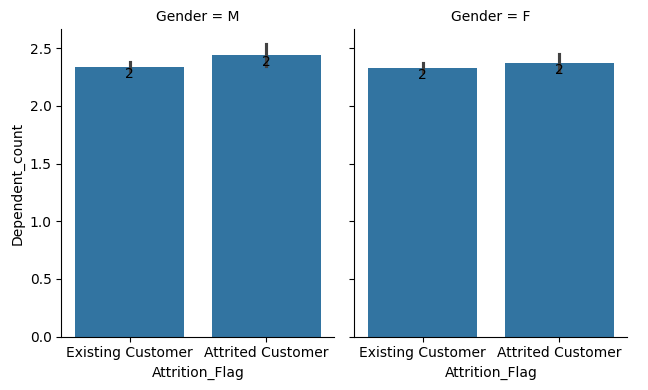

In [12]:
# Observo ambas categorías de clientes (vigentes y no vigentes) por género y cantidad de personas dependientes
g2=sns.catplot(
    data=df, x="Attrition_Flag", y='Dependent_count', col="Gender",
    kind="bar", height=4, aspect=.8,
)
for ax in g2.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(),
                f'{p.get_height():1.0f}', ha='center', va='top')
g2

Insight: Los clientes no vigentes fueron  el 57.2% mujeres y 42.8% hombres.
No se observa un patrón en términos de la cantidad de dependientes por género, aunque levemente incide más en el género masculino que en el femenino a la hora de desvincularse de la tarjeta.

Análisis por **estado civil**

In [13]:
# Cantidad de clientes no vigentes por estado civil
df_1.Marital_Status.value_counts()

Married     709
Single      668
Unknown     129
Divorced    121
Name: Marital_Status, dtype: Int64

In [14]:
# Cantidad de clientes no vigentes por estado civil en %
tot_filas = len(df_1)
df_1.Marital_Status.value_counts()
part_porc_est_civil=(df_1.Marital_Status.value_counts()/tot_filas*100).round(2)
part_porc_est_civil

Married     43.58
Single      41.06
Unknown      7.93
Divorced     7.44
Name: Marital_Status, dtype: Float64

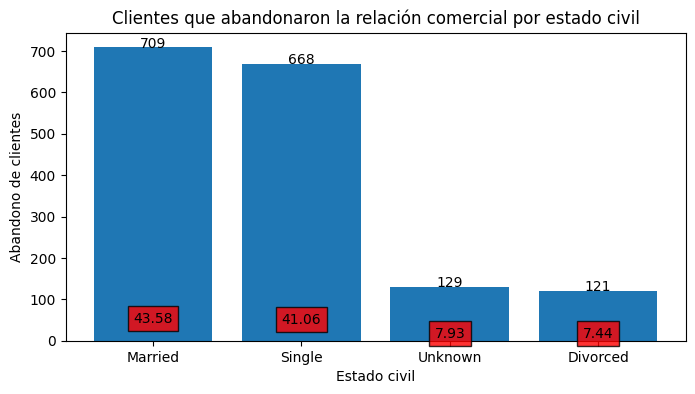

In [15]:
def add_value_label_ent(x_list, y_list):     # Defino que se agreguen las etiquetas de datos en las barras, centradas.
    for i in range(0, len(x_list)):      # se hace con un for para que recorra iterativamente las categorías asignadas al eje x
        plt.text(i, y_list[i], y_list[i], ha="center") # indico el texto centrado en las barras

def add_value_label_porc(x_list, y_list):     # Defino que se agreguen las etiquetas de datos en las barras, centradas.
    for i in range(0, len(x_list)):      # se hace con un for para que recorra iterativamente las categorías asignadas al eje x
        plt.text(i, y_list[i], y_list[i], ha="center", bbox= dict(facecolor = 'red', alpha =.8)) # indico el texto centrado en las barras en un recuadro (bbox)

est_civil_labels= df_1.Marital_Status.unique()  # defino los valores categóricos
est_civil_values = df_1.Marital_Status.value_counts() # defino que cuente los valores de cada categoría

fig, ax = plt.subplots(figsize=(8,4))     # defino el gráfico
g3=ax.bar(est_civil_labels, est_civil_values)

add_value_label_ent(est_civil_labels,est_civil_values)   # agrego etiquetas de valor con el recuento
add_value_label_porc(est_civil_labels,part_porc_est_civil) # agrego etiquetas con la participación %


ax.set_title('Clientes que abandonaron la relación comercial por estado civil')
ax.set_ylabel('Abandono de clientes')
ax.set_xlabel('Estado civil')
plt.show()

Insight: La mayoría de los clientes que abandonaron la relación comercial eran casados (43.58%) o solteros (41.06%), casi en la misma proporción. No se observa una diferencia importante en el aporte de cada uno de estos grupos al total.
El grupo de menor impacto es el de divorciados (7.44%), lo que permite inferir que conforma un grupo de clientes más fidelizado.  


In [16]:
abandono_acum = df_1.groupby(['Marital_Status'])
abandono_acum

Análisis por edad

In [17]:
# Calculo las mediana de la edad de los clientes vigentes y no vigentes
edad_median_vigente=df.Customer_Age.loc[df.Attrition_Flag=='Existing Customer'].median()
edad_median_no_vigente=df.Customer_Age.loc[df.Attrition_Flag=='Attrited Customer'].median()
edad_prom_vigente=df.Customer_Age.loc[df.Attrition_Flag=='Existing Customer'].mean()
edad_prom_no_vigente=df.Customer_Age.loc[df.Attrition_Flag=='Attrited Customer'].mean()
# Armo una tabla con las medianas
tabla_mediana_edad = pd.DataFrame({
    'Series de Edades': ['Vigente', 'No vigente'],
    'Mediana': [edad_median_vigente, edad_median_no_vigente],
    'Promedio': [edad_prom_vigente, edad_prom_no_vigente]
})

print(tabla_mediana_edad)

  Series de Edades  Mediana   Promedio
0          Vigente     46.0  46.262118
1       No vigente     47.0  46.659496


La edad promedio de los clientes es de 46 años, siendo el cliente más joven en la base de 26 años y el mayor de 73 años. Siendo el desvío estándar de 8 años, la mayor parte de los clientes se concentra entre 38 y 54 años.  (esto sale del df.info()).
De hecho, la mediana de edad de los clientes vigentes (46 años) es similar a la de los no vigentes (47 años).
Hay valores outliers en la población de clientes vigentes (superan los 70 años).
La similar distribución por edad se observa también en el gráfico de bigotes que sigue:


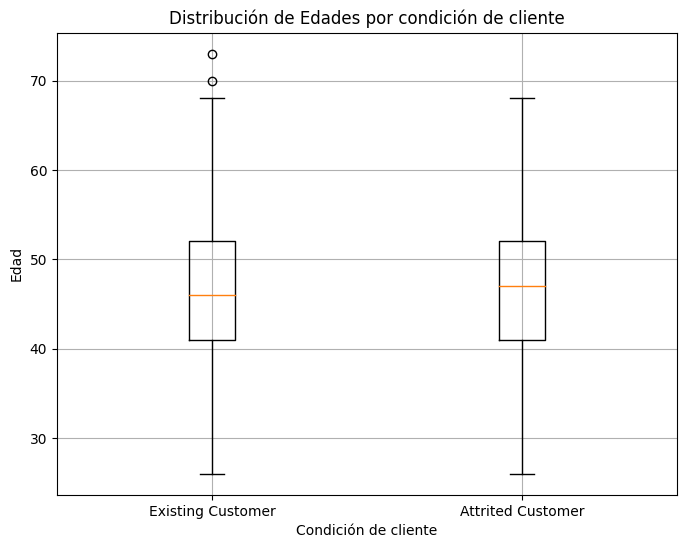

In [18]:
# Realizo un gráfico de caja y bigotes para evaluar la distribución de edades de los clientes vigentes y no vigentes.
import numpy as np

# Datos edades
edades_vigente= df.Customer_Age.loc[df.Attrition_Flag=='Existing Customer']
edades_no_vigente=df.Customer_Age.loc[df.Attrition_Flag=='Attrited Customer']

# Crear el gráfico de caja
plt.figure(figsize=(8, 6))
g4= plt.boxplot([edades_vigente, edades_no_vigente], labels=df.Attrition_Flag.unique())

# Añadir título y etiquetas de los ejes
plt.title('Distribución de Edades por condición de cliente')
plt.xlabel('Condición de cliente')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.grid(True)
plt.show()

No se puede detectar un patrón entre la edad y la decisión de desvincularse de la relación comercial.

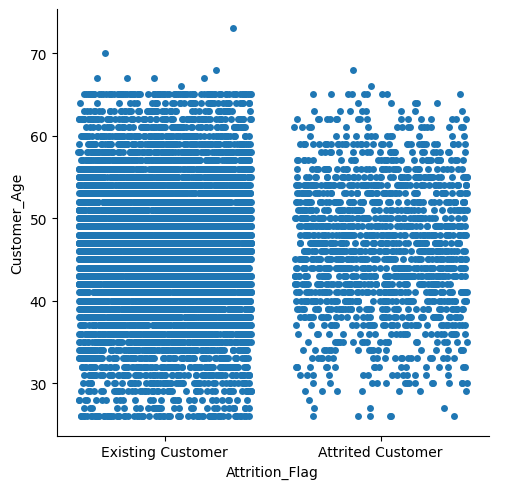

In [19]:
# Evalúo la concentración de cientes por edad, según tipo de cliente (vigente o no vigente)
import seaborn as sns
g5= sns.catplot(x = "Attrition_Flag", y = "Customer_Age", data = df, jitter = 0.4); # La concentración es menor en las edades extremas para ambas categorías de clientes (vigentes y no vigentes). No obstante, en el caso de los clientes que se dieron de baja la mayor cencentración se da en el segmento de 40 a 55 años.

se observa que la concentración es menor en las edades extremas para ambas categorías de clientes (vigentes y no vigentes), lo cual coincide con la estructura etaria de la población. No obstante, en el caso de los clientes que se dieron de baja, se observa una mayor concentración en el segmento de 40 a 55 años.

In [20]:
# Evalúo si la edad se relaciona con los saldos impagos
df_1['Total_Revolving_Bal'].max()
df_1['Total_Revolving_Bal'].min()
print('Valores extremos del saldo impago')
print('max=',df_1['Total_Revolving_Bal'].max())
print('min=',df_1['Total_Revolving_Bal'].min())

Valores extremos del saldo impago
max= 2517
min= 0


Text(0, 0.5, 'Edad')

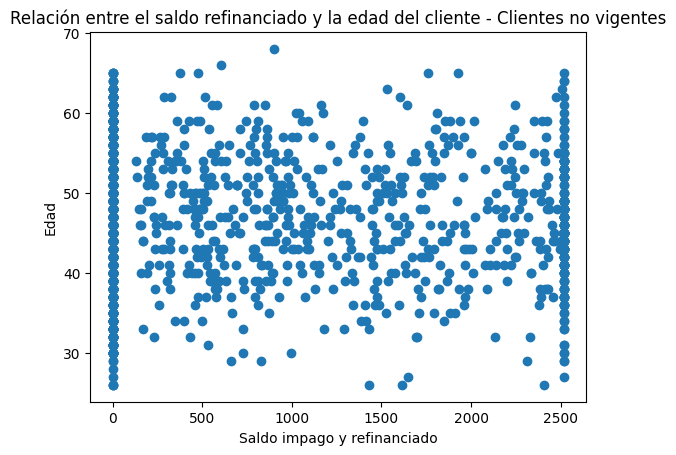

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g6= scatter = ax.scatter(df_1['Total_Revolving_Bal'], df_1['Customer_Age'])
ax.set_title('Relación entre el saldo refinanciado y la edad del cliente - Clientes no vigentes')
ax.set_xlabel('Saldo impago y refinanciado')
ax.set_ylabel('Edad')    # No se observa relación entre el saldo impago y la edad de los clientes que se dieron de baja.

De la gráfica de puntos no surge una relación entre ambas variables, por lo que la edad no sería un factor relevante en los saldos consumidos.

Análisis por dependientes

In [22]:
df.Dependent_count.unique()

<IntegerArray>
[3, 5, 4, 2, 0, 1]
Length: 6, dtype: Int64

Text(0, 0.5, 'Cantidad de clientes')

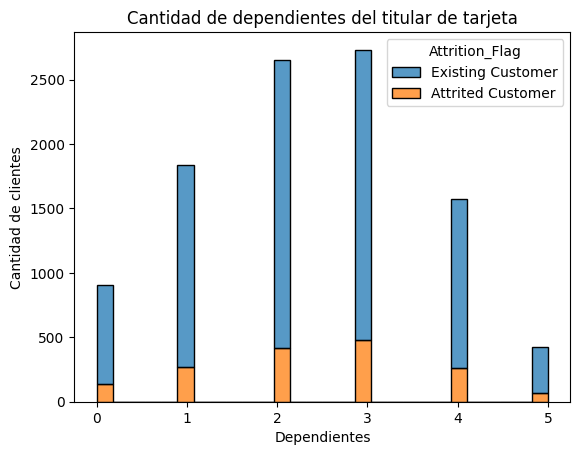

In [23]:
# Creo un histograma de frecuencias para determinar patrones entre la cantidad de dependientes y la condición de clientes
g7=sns.histplot(data=df,
x="Dependent_count", hue="Attrition_Flag", multiple="stack")
plt.title ('Cantidad de dependientes del titular de tarjeta')
plt.xlabel('Dependientes')
plt.ylabel('Cantidad de clientes')

En ambos grupos (clientes vigentes y no vigentes), la cantidad de dependientes que se observa con mayor frecuencia es de 3 y 2 dependientes por titular de la tarjeta. Por tanto, la cantidad de dependientes no influiría directamente en la vigencia del cliente.

Análisis por tipo de tarjeta

<ipython-input-24-47bd7c166047>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-24-47bd7c166047>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(order_income)


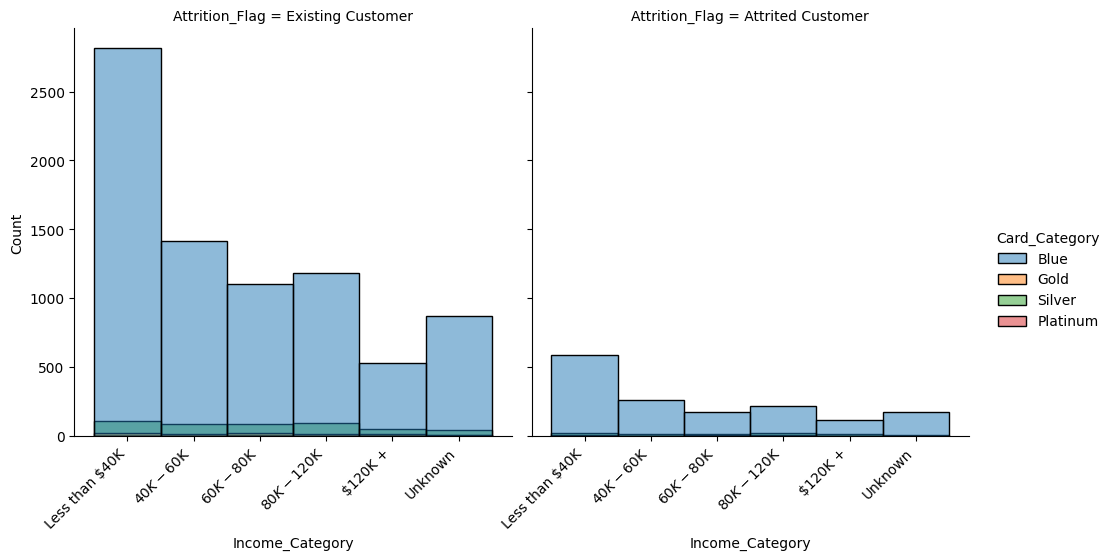

In [24]:
# Cantidad de tarjetas por categoría de ingresos

import seaborn as sns
# Defino el orden de las etiquetas del eje x (categorías de ingreso)
order_income = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']

# organizo los datos según el orden de 'Income_Category'
df['Income_Category'] = pd.Categorical(df['Income_Category'], categories=order_income, ordered=True)

# armo el gráfico
g8=sns.displot(data=df, x="Income_Category", hue="Card_Category", col="Attrition_Flag")
for ax in g8.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for ax in g8.axes.flat:
    ax.set_xticklabels(order_income)


Insight: La categoría de tarjeta Blue es la de mayor frecuencia, para ambos tipos de clientes (vigentes y no vigentes), seguida de la Silver.  
En ambos grupos, se replica la proporción de clientes para cada
categoría de ingresos, siendo la mayor la que se encuentra en el rango de ingresos menores a $40k.
Asimismo, se observa que en los clientes no vigentes predomina la categoría de tarjeta “Blue”, siendo la participación de las tarjetas de mayor gama (gold, silver y platinum) muy baja.



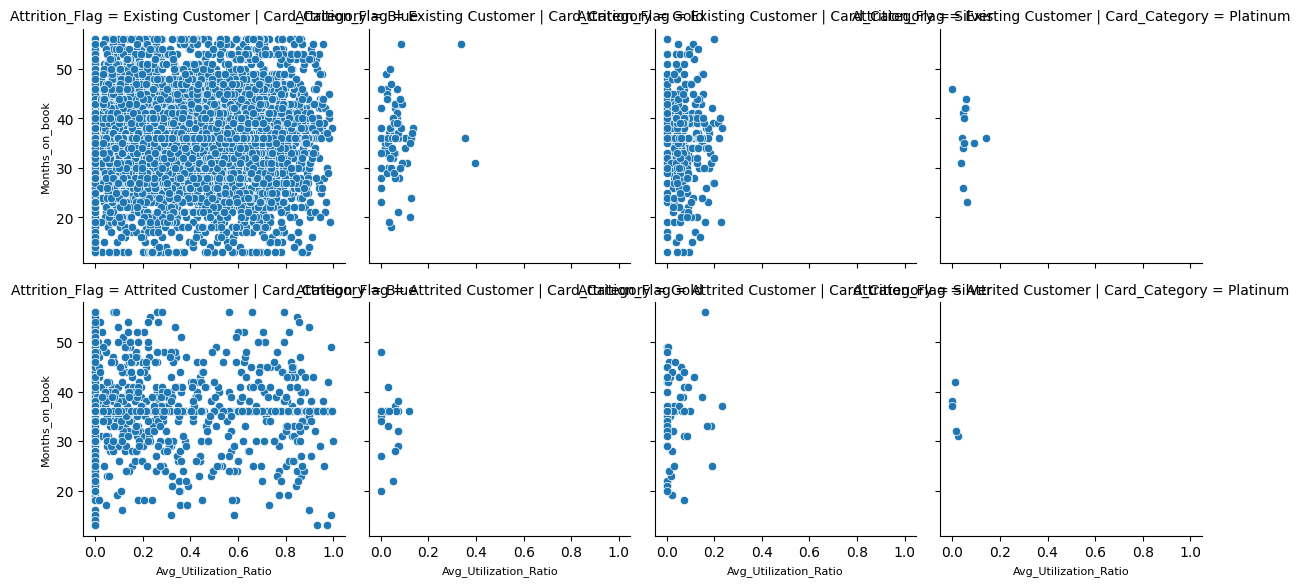

In [25]:
# Antiguedad y uso de la tarjeta por tipo de tarjeta

# FacetGrid
g9 = sns.FacetGrid(df, col="Card_Category", row="Attrition_Flag")
g9.map(sns.scatterplot, "Avg_Utilization_Ratio", "Months_on_book")
g9.set_axis_labels('Avg_Utilization_Ratio', 'Months_on_book', fontsize=8)

# No logré cambiar el tamaño de la letra de las etiquetas de columnas y filas para visualizar mejor.
# Probé con g9.set_titles(col_template="{Card_Category}", row_template="{Attrition_Flag}", fontsize=8), pero me da error!

No se observa a priori una relación entre el ratio medio de uso de la tarjeta (uso de saldo  límite de saldo) y la antiguedad (en meses) de los clientes, ni por tipo de tarjeta ni por tipo de cliente.

Text(0, 0.5, 'Uso promedio del límite')

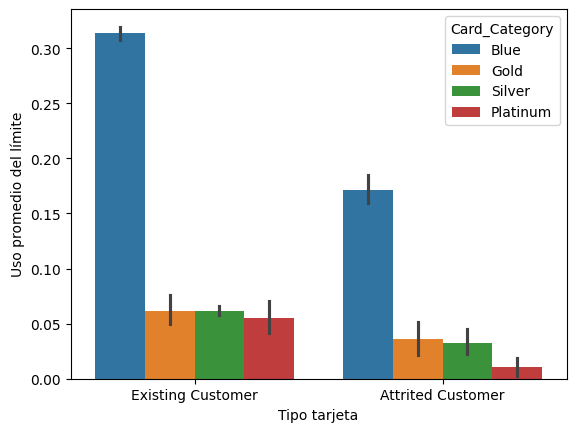

In [26]:
# Uso de la tarjeta por tipo de tarjeta

g10= sns.barplot (x='Attrition_Flag', y='Avg_Utilization_Ratio', hue="Card_Category",data=df)
plt.xlabel('Tipo tarjeta')
plt.ylabel('Uso promedio del límite')


El uso promedio del límite (límite de consumo menos saldo consumido) más alto se da en la tarjeta "blue", en ambos grupos de clientes (vigentes y no vigentes). En el caso de los clientes no vigentes, el uso promedio del límite fue menor en todas las categorías de tarjeta. Esto permite inferir que los clientes que dieron de baja la tarjeta no la utilizaban a su máximo potencial.

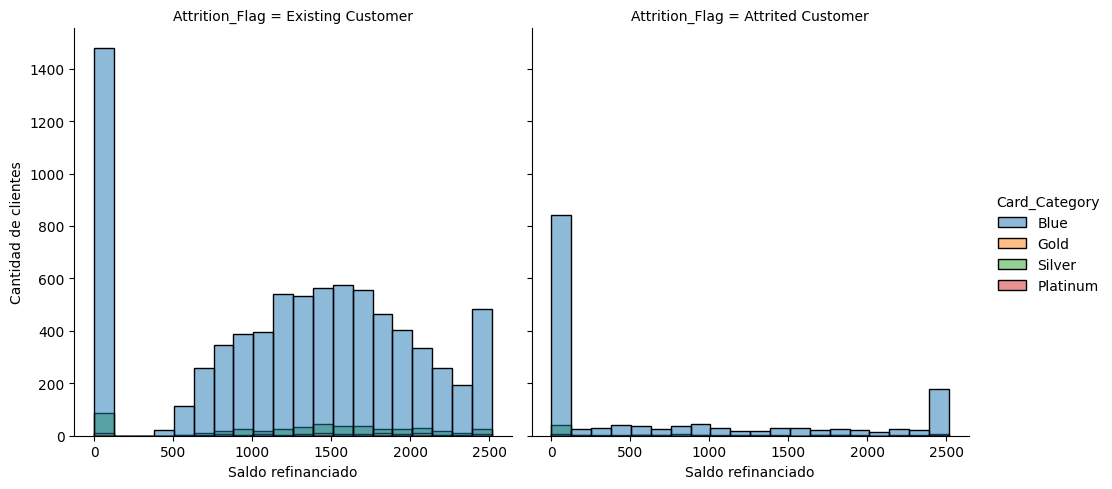

In [27]:
# Saldos refinanciados por monto, cantidad de clientes y tipo de tarjeta

g11=sns.displot(data=df, x="Total_Revolving_Bal", hue="Card_Category", col="Attrition_Flag")
g11.set_axis_labels("Saldo refinanciado","Cantidad de clientes", )

In [28]:
consumo_prom_vigente=df.Total_Revolving_Bal.loc[df.Attrition_Flag=='Existing Customer'].mean()
consumo_prom_no_vigente=df.Total_Revolving_Bal.loc[df.Attrition_Flag=='Attrited Customer'].mean()
print('Saldo promedio refinanciado clientes vigentes=', consumo_prom_vigente.round(2), ' $')
print('Saldo promedio refinanciado clientes no vigentes=', consumo_prom_no_vigente.round(2), ' $')


Saldo promedio refinanciado clientes vigentes= 1256.6  $
Saldo promedio refinanciado clientes no vigentes= 672.82  $


En ambas categorías de clientes (vigentes y no vigentes), predominan los saldos refinanciados bajos (menores a 500$) para los tipos de tarjetas más frecuentes (Blue y Silver). Esto es deseable, ya que da cuenta de que la cartera de clientes no muestra una alta dependencia del crédito.
Los clientes vigentes en promedio muestran un saldo refinanciado promedio mayor al de los no vigentes.
Esto, analizado en conjunto con el análisis del gráfico 10 (donde se observó que los clientes no vigentes usaban menos la trajeta respecto de su limite potencial), permite deducir que que los clientes que se desvincularon de la relación comercial no representaban clientes representativos en cuanto al consumo y uso de la tarjeta.

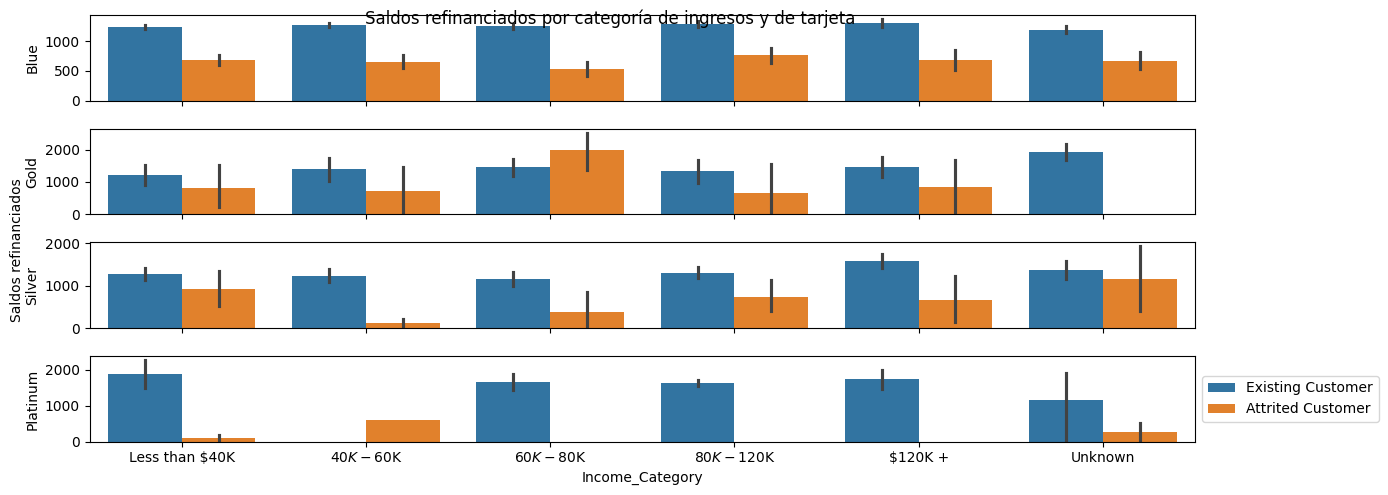

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Defino una variable de consumo por tipo de tarjeta
rev_bal_blue=df[df.Card_Category=='Blue']['Total_Revolving_Bal']
rev_bal_gold=df[df.Card_Category=='Gold']['Total_Revolving_Bal']
rev_bal_silver=df[df.Card_Category=='Silver']['Total_Revolving_Bal']
rev_bal_platinum=df[df.Card_Category=='Platinum']['Total_Revolving_Bal']

# defino un objeto ax con 4 filas y una sola columna
g12=fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 5), sharex=True)
sg12_1=sns.barplot(x="Income_Category", y=rev_bal_blue, hue="Attrition_Flag",data=df, ax=axs[0], legend=True)
sg12_2=sns.barplot(x="Income_Category", y=rev_bal_gold, hue="Attrition_Flag",data=df, ax=axs[1], legend=False)
sg12_3=sns.barplot(x="Income_Category", y=rev_bal_silver, hue="Attrition_Flag",data=df, ax=axs[2], legend=False)
sg12_4=sns.barplot(x="Income_Category", y=rev_bal_platinum, hue="Attrition_Flag",data=df, ax=axs[3], legend=False)

# Ajustar el espacio entre los subgráficos
plt.tight_layout()

# Agrego etiqueta eje x
plt.suptitle('Saldos refinanciados por categoría de ingresos y de tarjeta')

# Agregar etiqueta al eje y para todos los subgráficos
fig.text(0, 0.5, 'Saldos refinanciados', va='center', rotation='vertical')
axs[0].set_ylabel('Blue')
axs[1].set_ylabel('Gold')
axs[2].set_ylabel('Silver')
axs[3].set_ylabel('Platinum')

# Eliminar la leyenda automática del primer subgráfico
axs[0].get_legend().remove()

# Agrego una única leyenda para todo el gráfico
handles, labels = sg12_1.get_legend_handles_labels()

# Extraer leyendas de un subgráfico donde sí hay leyenda
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

> *Clientes vigentes*

En el caso de la tarjeta Blue (la mayoritaria), los saldos refinanciados de los clientes vigentes muestran valores similares para todas las categorías de ingresos, por lo que el ingreso no sería un factor relevante a la hora de definir si mayor ingreso genera menor necesidad de refinanciamiento del cliente. En el caso de la Silver (la segunda en importancia en cantidad de tarjetas emitidas), sí se observa un mayor saldo refinanciado en los ingresos mayores a $120k. Por el lado de la Platinum, se observan mayores saldos refinanciados en la categoria de ingresos más baja.


> *Clientes no vigentes*

En el caso de los clientes no vigentes, se destacan los saldos refinanciados en la categoria de ingresos medios (60k -80k) en la tarjeta Gold. Esto define un segmento de clientes a analizar a la hora de decidir reicorporarlos, ya que el mayor monto refinanciado afecta negativamente el scoring del cliente. Además, mayor refinanciamiento genera intereses, lo cual puede afectar la solvencia del cliente.




Determinación de outliers

Text(15.847222222222216, 0.5, 'Monto total de transacción')

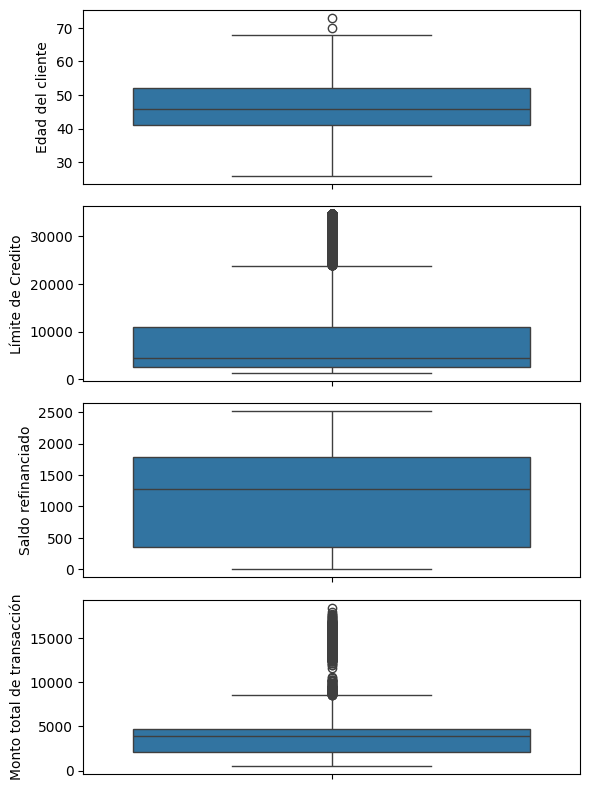

In [30]:
# defino un objeto ax con 4 filas
g13=fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(6, 8), sharex=True)
sns.boxplot(df["Customer_Age"], ax=axs[0])
sns.boxplot(df["Credit_Limit"], ax=axs[1])
sns.boxplot(df["Total_Revolving_Bal"], ax=axs[2])
sns.boxplot(df["Total_Trans_Amt"], ax=axs[3])

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
# Añadir etiquetas a los ejes
axs[0].set_ylabel("Edad del cliente")
axs[1].set_ylabel("Límite de Credito")
axs[2].set_ylabel("Saldo refinanciado")
axs[3].set_ylabel("Monto total de transacción")

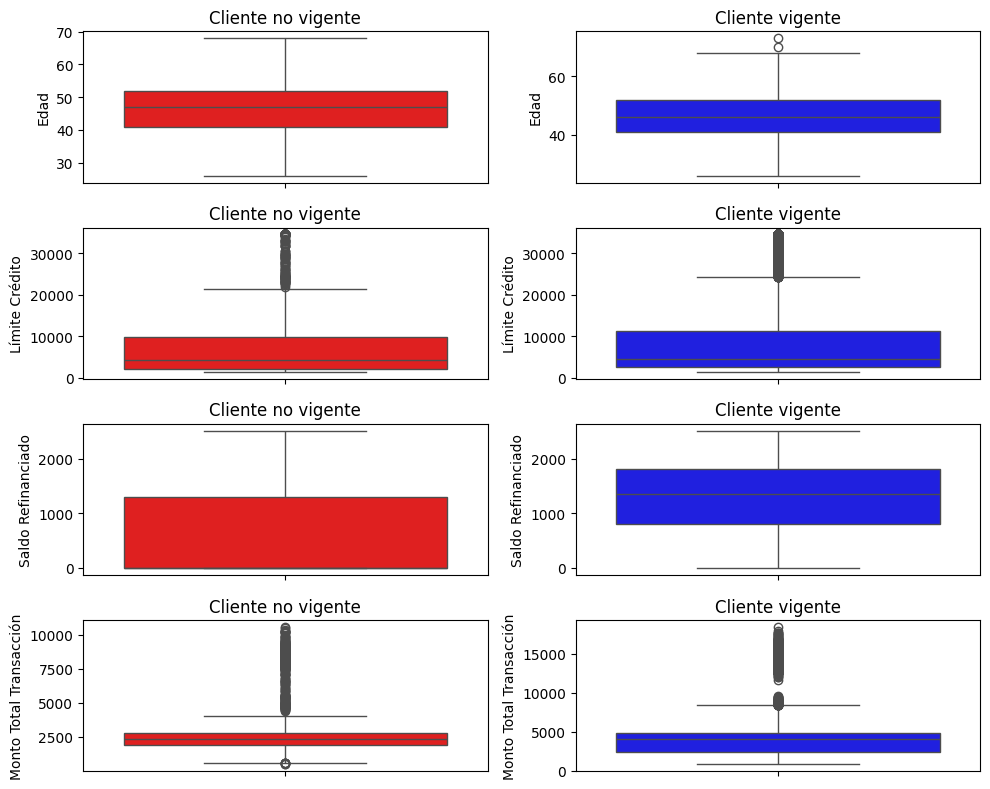

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defino un objeto ax con 4 filas y 2 columnas
g14=fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 8), sharex=True)

# Divido el df agrupando por tipo de cliente (vigente y no vigente)
grouped = df.groupby('Attrition_Flag')

# Defino las variables a graficar
variables = ["Customer_Age", "Credit_Limit", "Total_Revolving_Bal", "Total_Trans_Amt"]

# Itero sobre cada grupo y cada variable para crear los boxplots
for i, (key, group) in enumerate(grouped):    # enumerate para tener índices tanto para los grupos como para las variables.
    for j, var in enumerate(variables):
        sns.boxplot(group[var], ax=axs[j, i], color='red' if key == 'Attrited Customer' else 'blue')

       # Agrego título a cada columna
        axs[j, i].set_title('Cliente no vigente' if key == 'Attrited Customer' else 'Cliente vigente')

        # Cambio títulos a los ejes y
        axs[j, i].set_ylabel(var.replace('Customer_Age', 'Edad').replace('Credit_Limit', 'Límite crédito').replace('Total_Revolving_Bal', 'Saldo refinanciado').replace('Total_Trans_Amt', 'Monto total transacción').title())

# Ajusto el espacio entre los subgráficos
plt.tight_layout()
plt.show()

Se observa una importante cantidad de outliers en el límite de crédito y en el monto total de transacción, tanto en la población total, como en las subcategorías de clientes.

In [32]:
# Defino un dataframe con los outliers para evaluar los registros
# Rango intercoartil (IQR)
Q1_credit=df["Credit_Limit"].quantile(0.25)
Q3_credit=df["Credit_Limit"].quantile(0.75)
Q1_tot_amt=df["Total_Trans_Amt"].quantile(0.25)
Q3_tot_amt=df["Total_Trans_Amt"].quantile(0.75)
IQR_credit= Q3_credit-Q1_credit
IQR_tot_amt= Q3_tot_amt-Q1_tot_amt

# Calculo los límites
lim_inf_credit= Q1_credit - 1.5 * IQR_credit
lim_sup_credit= Q3_credit +1.5 *IQR_credit
lim_inf_tot_amt= Q1_tot_amt - 1.5 * IQR_tot_amt
lim_sup_tot_amt= Q3_tot_amt +1.5 *IQR_tot_amt

# Armo el dataframe
df_outliers= df[(df["Total_Trans_Amt"]<lim_inf_tot_amt) | (df["Total_Trans_Amt"]>lim_sup_tot_amt) & (df["Credit_Limit"]<lim_inf_credit) | (df["Credit_Limit"]>lim_sup_credit)]
df_outliers.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_1,Naive_Bayes_2
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991


In [33]:
df_outliers.shape

(984, 23)

In [57]:
outliers_vigentes=df_outliers.CLIENTNUM.loc[df_outliers.Attrition_Flag=='Existing Customer'].count()
outliers_no_vigentes=df_outliers.CLIENTNUM.loc[df_outliers.Attrition_Flag=='Attrited Customer'].count()
print('Outliers en clientes vigentes=',outliers_vigentes )
print('Outliers en clientes no vigentes=', outliers_no_vigentes)
print('% de outliers de clientes no vigentes sobre el total de outliers:', ((outliers_no_vigentes/(outliers_no_vigentes+outliers_vigentes))*100).round(2), '%')
print('% de outliers de clientes no vigentes respecto del total de outliers en clientes vigentes:', ((outliers_no_vigentes/outliers_vigentes)*100).round(2), '%')

Outliers en clientes vigentes= 826
Outliers en clientes no vigentes= 158
% de outliers de clientes no vigentes sobre el total de outliers: 16.06 %
% de outliers de clientes no vigentes respecto del total de outliers en clientes vigentes: 19.13 %
